In [1]:
# Hypothesis: h(x) = theta0 + theta1*x
# Parameters: theta0, theta1
# Cost Function: J(theta0, theta1) = 1/2m Sum_1toM (h(X) - Y)^2
# Goal: minimize J(theta0, theta1)

# y_hat = theta0*b + theta1*x | Z = Theta^T X
# theta = theta - alpha * d/d*theta J(theta0, theta1)
# theta1 = theta1 - alpha * d/d*theta1 J(theta0, theta1)
# theta0 = theta0 - alpha * d/d*theta0 J(theta0, theta1)

# m = number of inputs
# n = number of features

In [2]:
# loading the mnist dataset
# from tensorflow.keras.datasets.mnist import load_data

# load the images into memory
# (trainX, trainy), (testX, testy) = load_data()

# summarize the shape of the dataset
# print('Train', trainX.shape, trainy.shape)
# print('Test', testX.shape, testy.shape)

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('mnist/train.csv')
data = np.array(data)
m, n = data.shape
print(m, n)

42000 785


In [10]:
m_test = 1000

np.random.shuffle(data)
data_test = data[0: m_test].T
y_test = data_test[0]
x_test = data_test / 255
x_test[0] = np.ones(m_test)
# y_test: (785, 1000)


data_train = data[m_test:].T
y_train = data_train[0]
x_train = data_train / 255
x_train[0] = np.ones(m-m_test)
# y_test: (785, 61000)

n_input, _ = x_train.shape
n_hidden = 28
n_output = 10

785


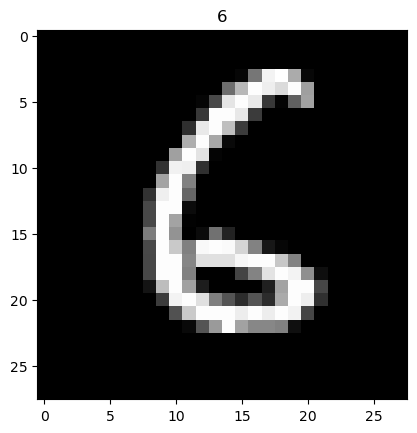

In [18]:
def show_data(x, y, index):
    current_img = x[1:n_input, index]
    current_label = y[index]
    current_img = current_img.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_img)
    plt.title(current_label)
    plt.show


show_data(x_train, y_train, 76)

In [49]:
def init_param():
    theta1 = np.random.rand(n_hidden, n_input+1) - .5
    theta2 = np.random.rand(n_output, n_hidden+1) - .5
    return theta1, theta2

def sigmoid(z):
    return 1.0/(1+np.exp(-z))

def derivative_sigmoid(z):
    return sigmoid(z)*(1-sigmoid(z))

def ReLU(z):
    return np.max(z, 0)

def derivative_ReLU(z):
    return z > 0

def forward_prop(theta1, theta2, x):
    z2 = theta1.dot(x)
    a2_temp = ReLU(z2)
    a2 = np.ones([n_hidden+1, m_train])
    a2[1: n_hidden+1, :] = a2_temp
    z3 = theta2.dot(a2)
    a3 = sigmoid(z3)
    return z2, a2, z3, a3

def y_convert(y):
    y_convert_y = np.zeros(y.size, y.max()+1)
    y_convert_y[np.arange(y.size), y] = 1
    y_convert_y = y_convert_y.T
    return y_convert_y

def backward_prop(Z2, A2, Z3, A3, X, Y, theta2):
    Y_convert_y = y_convert(Y)
    s_del3 = A3 - Y_convert_y
    deriv = derivative_sigmoid(Z3)
    # deriv = derivative_ReLU(z)
    s_del3 = np.multiply(s_del3, deriv)
    b_del2 = s_del3.dot(A2.T)
    temp1 = (theta2.T).dot(s_del3)
    temp2 = temp1[1:n_hidden+1, :]
    temp3 = derivative_ReLU(Z2)
    # theta = theta-(1/m)*alpha*b_del
    return theta

def get_error(h, y):
    return np.sum(np.multiply((h-y), (h-y)))/y.size

def gradient_decent(X, Y, iteration):
    theta = init_param()
    for i in range(iteration):
        z, h = forward_prop(theta, X)
        theta = backward_prop(X, Y, z, h, theta, .1, y.size)
        if (i%1000 == 0):
            print('iteration', i)
            print('error', get_error(h, Y))

    return theta

In [50]:
final_theta = gradient_decent(x_train, y, 10000)

iteration 0
error 0.26211643095093223
iteration 1000
error 0.00018386616873587123
iteration 2000
error 0.0001837079789446615
iteration 3000
error 0.00018370797870978812
iteration 4000
error 0.00018370797870978744
iteration 5000
error 0.000183707978709786
iteration 6000
error 0.000183707978709786
iteration 7000
error 0.000183707978709786
iteration 8000
error 0.000183707978709786
iteration 9000
error 0.000183707978709786


In [68]:
Predict_X = np.array([500, 1500, 2000])
Predict_X = Predict_X / x_max

Test_Prd_X = np.ones([2, Predict_X.size])
Test_Prd_X[1] = Predict_X

Predicted_Y = final_theta.dot(Test_Prd_X)

In [58]:
print(Predicted_Y*y_max)

[[14.87143478 44.79800696 59.76129305]]


[[0.08331993 0.26266836 0.35761754 0.4912497  0.59674878 0.80774694
  1.0187451 ]]


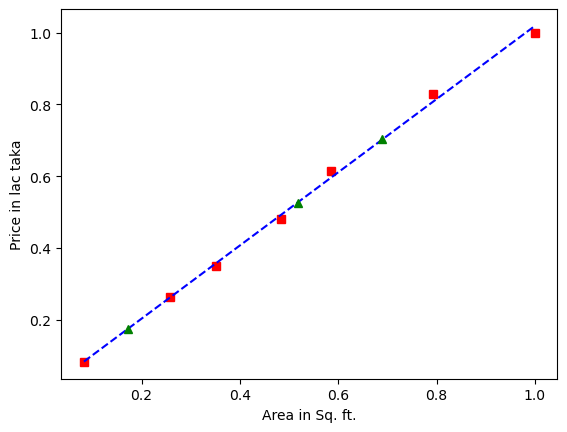

In [69]:
def plot_carve(X, Y, theta):
    y_cal = theta.dot(X)
    # plt.plot(X[1], (Y.T), 'rs', X[1], (y_cal.T), 'b--')
    plt.plot(X[1], (Y.T), 'rs', X[1], (y_cal.T), 'b--', Predict_X, (Predicted_Y.T), 'g^')
    plt.xlabel('Area in Sq. ft.')
    plt.ylabel('Price in lac taka')
    return y_cal

print(plot_carve(x_train, y, final_theta))